In [80]:
#import all the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
import nltk, re, pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
#add feature function
# def add_feature(X, feature_to_add):
#     """
#     Returns sparse feature matrix with added feature.
#     feature_to_add can also be a list of features.
#     """
#     from scipy.sparse import csr_matrix, hstack
#     return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [81]:
#load the data
B07D2M6B23 = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07D2M6B23_20201207_192133.csv')
B07D2M6B23['Product'] = 'B07D2M6B23'

B07QCWG461 = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07QCWG461_20201207_192025.csv')
B07QCWG461['Product'] = 'B07QCWG461'

B07DFFCCFM = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07DFFCCFM_20201207_185340.csv')
B07DFFCCFM['Product'] = 'B07DFFCCFM'

B07NSP573D = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07NSP573D_20201207_190429.csv')
B07NSP573D['Product'] = 'B07NSP573D'

B0793F295W = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B0793F295W_20201207_190909.csv')
B0793F295W['Product'] = 'B0793F295W'

B07D2LC8LH = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07D2LC8LH_20201207_191945.csv')
B07D2LC8LH['Product'] = 'B07D2LC8LH'

B07D2LVYQZ = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07D2LVYQZ_20201207_191725.csv')
B07D2LVYQZ['Product'] = 'B07D2LVYQZ'

B07XB3DYZM = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07XB3DYZM_20201207_191625.csv')
B07XB3DYZM['Product'] = 'B07XB3DYZM'

B07NRW6H8M = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07NRW6H8M_20201207_191535.csv')
B07NRW6H8M['Product'] = 'B07NRW6H8M'

B07NS381GK = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07NS381GK_20201207_185109.csv')
B07NS381GK['Product'] = 'B07NS381GK'

B01N5HUE1P = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B01N5HUE1P_20201207_190157.csv')
B01N5HUE1P['Product'] = 'B01N5HUE1P'

B07NS42Z35 = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07NS42Z35_20201207_191455.csv')
B07NS42Z35['Product'] = 'B07NS42Z35'

B07485T22B = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07485T22B_20201207_191155.csv')
B07485T22B['Product'] = 'B07485T22B'

B07XQMC76X = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07XQMC76X_20201207_191319.csv')
B07XQMC76X['Product'] = 'B07XQMC76X'

B07HLQFQ5F = pd.read_csv(r'D:\Users\Фёдор\Desktop\Python\Python\Coursera\Text Mining\Artistro Amazon Review\amazonartistroreviews\B07HLQFQ5F_20201207_192227.csv')
B07HLQFQ5F['Product'] = 'B07HLQFQ5F'

In [82]:
#merge all into 1 table
frames = [B07D2M6B23, B07QCWG461, B07DFFCCFM, B07NSP573D,  B0793F295W,  B07D2LC8LH, B07D2LVYQZ, B07XB3DYZM,  
          B07NRW6H8M, B07NS381GK, B01N5HUE1P, B07NS42Z35, B07485T22B, B07XQMC76X, B07HLQFQ5F]
resul = pd.concat(frames)
resul = resul.reset_index()

In [83]:
#remove neutral ratings and select only nessesary columns
df = resul[resul['Rating'] != 3]
df = df[['Product', 'Rating', 'Body']]
df.dropna(inplace=True)
#assign 1 for posistive and 0 for negative:
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
#replace ""
df.Body = df['Body'].str.replace('"', '')

In [84]:
df['Positively Rated'].mean() #Most ratings are positive

0.9255106127352823

In [85]:
df['Positively Rated'].value_counts()/df.shape[0]

1    0.925511
0    0.074489
Name: Positively Rated, dtype: float64

In [86]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Body'], 
                                                    df['Positively Rated'], 
                                                    random_state=2)

In [87]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Very easy to use. My eight year old is using them for a Christmas project.


X_train shape:  (7491,)


In [275]:
vect = CountVectorizer().fit(X_train)

In [276]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<7491x7604 sparse matrix of type '<class 'numpy.int64'>'
	with 136640 stored elements in Compressed Sparse Row format>

# Simple Logistic Regression model:

In [277]:
# Train the model
model_simple = LogisticRegression()
model_simple.fit(X_train_vectorized, y_train)

LogisticRegression()

In [278]:
# Predict the transformed test documents
predictions_simple = model_simple.predict(vect.transform(X_test))

print(f'Accuracy Score: {accuracy_score(y_test,predictions_simple)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions_simple)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions_simple)}')
print(f'Recall score: {recall_score(y_test,predictions_simple)}')
print(f'Precision score: {precision_score(y_test,predictions_simple)}')

Accuracy Score: 0.9503404084901882
Confusion Matrix: 
[[ 106   91]
 [  33 2267]]
Area Under Curve: 0.7618616199514456
Recall score: 0.9856521739130435
Precision score: 0.9614079728583546


In [279]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_simple.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['return' 'half' 'not' 'never' 'terrible' 'splatter' 'disappointed'
 'cheap' 'say' 'dried']

Largest Coefs: 
['easy' 'love' 'perfect' 'great' 'excellent' 'best' 'fun' 'perfectly'
 'nice' 'beautiful']


In [281]:
print(model_simple.predict(vect.transform(['markers are good',
                                    'markers are not good'])))

[1 1]


In [93]:
len(feature_names)

7604

# Adding Tfidf logic:

In [121]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect_tfidf = TfidfVectorizer(min_df=7).fit(X_train)
len(vect_tfidf.get_feature_names())

1511

In [122]:
X_train_vectorized = vect_tfidf.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions_tfidf = model.predict(vect_tfidf.transform(X_test))

# performance
print(f'Accuracy Score: {accuracy_score(y_test,predictions_tfidf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions_tfidf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions_tfidf)}')
print(f'Recall score: {recall_score(y_test,predictions_tfidf)}')
print(f'Precision score: {precision_score(y_test,predictions_tfidf)}')

Accuracy Score: 0.9447336804164999
Confusion Matrix: 
[[  67  130]
 [   8 2292]]
Area Under Curve: 0.6683116309865371
Recall score: 0.9965217391304347
Precision score: 0.9463253509496284


In [124]:
print(model.predict(vect_tfidf.transform(['markers are good',
                                    'nice for painting'])))

[0 1]


# Main model with n-grams
    #Setting up vect models:

In [283]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect_count = CountVectorizer(min_df=7, ngram_range=(1,2), 
                             stop_words = frozenset(["you", "your", "zu"])).fit(X_train)
vect_tfidf = TfidfVectorizer(min_df=7, ngram_range=(1,2), 
                             stop_words = frozenset(["you", "your", "zu"])).fit(X_train)

X_train_vectorized = vect_count.transform(X_train)
X_train_vectorized_tfidf = vect_tfidf.transform(X_train)

print(len(vect_count.get_feature_names()))
print(len(vect_tfidf.get_feature_names()))

4536
4536


In [259]:
sorted(vect_tfidf.vocabulary_.items(), key=lambda bair: bair[1], reverse=True )[:20]

[('yr old', 4534),
 ('yr', 4533),
 ('young', 4532),
 ('yet to', 4531),
 ('yet but', 4530),
 ('yet', 4529),
 ('yesterday', 4528),
 ('yes', 4527),
 ('yellow', 4526),
 ('years old', 4525),
 ('years', 4524),
 ('year old', 4523),
 ('year', 4522),
 ('xmas', 4521),
 ('wrote on', 4520),
 ('wrote', 4519),
 ('wrong', 4518),
 ('writing words', 4517),
 ('writing on', 4516),
 ('writing and', 4515)]

In [265]:
sorted(vect_count.vocabulary_.items(), key=lambda bair: bair[1], reverse=True )[:20]

[('zero', 4535),
 ('yr old', 4534),
 ('yr', 4533),
 ('young', 4532),
 ('yet to', 4531),
 ('yet but', 4530),
 ('yet', 4529),
 ('yesterday', 4528),
 ('yes', 4527),
 ('yellow', 4526),
 ('years old', 4525),
 ('years', 4524),
 ('year old', 4523),
 ('year', 4522),
 ('xmas', 4521),
 ('wrote on', 4520),
 ('wrote', 4519),
 ('wrong', 4518),
 ('writing words', 4517),
 ('writing on', 4516)]

In [284]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
X_test_vectorized = vect_count.transform(X_test)

predictions = model.predict(vect_count.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))

# performance
print(f'Accuracy Score: {accuracy_score(y_test,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions)}')
print(f'Recall score: {recall_score(y_test,predictions)}')
print(f'Precision score: {precision_score(y_test,predictions)}')

Accuracy Score: 0.9579495394473369
Confusion Matrix: 
[[ 116   81]
 [  24 2276]]
Area Under Curve: 0.7891988523504745
Recall score: 0.9895652173913043
Precision score: 0.965634280865507


In [286]:
print(model.predict(vect_count.transform(['markers are good',
                                    'markers are not good'])))

[1 1]


In [132]:
model = LogisticRegression()
model.fit(X_train_vectorized_tfidf, y_train)
X_test_vectorized_tfidf = vect_tfidf.transform(X_test)

predictions_tfidf = model.predict(vect_tfidf.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))

# performance
print(f'Accuracy Score: {accuracy_score(y_test,predictions_tfidf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions_tfidf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions_tfidf)}')
print(f'Recall score: {recall_score(y_test,predictions_tfidf)}')
print(f'Precision score: {precision_score(y_test,predictions_tfidf)}')

Accuracy Score: 0.9427312775330396
Confusion Matrix: 
[[  59  138]
 [   5 2295]]
Area Under Curve: 0.6486592363716619
Recall score: 0.9978260869565218
Precision score: 0.9432799013563502


In [287]:
print(model.predict(vect_tfidf.transform(['markers are good',
                                    'markers are not good'])))

[1 1]


# Unbalanced weights - ideal model is below

In [272]:
# define class weights
model_w = LogisticRegression(random_state=13,C=80,fit_intercept=True, 
                             penalty='l2',class_weight={0: 99.991, 1: 0.009} )
model_w.fit(X_train_vectorized, y_train)
X_test_vectorized = vect_count.transform(X_test)


predictions_w = model_w.predict(vect_count.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))

# performance
print(f'Accuracy Score: {accuracy_score(y_test,predictions_w)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions_w)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions_w)}')
print(f'Recall score: {recall_score(y_test,predictions_w)}')
print(f'Precision score: {precision_score(y_test,predictions_w)}')

D:\Applications\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8446135362434922
Confusion Matrix: 
[[ 174   23]
 [ 365 1935]]
Area Under Curve: 0.8622765393952769
Recall score: 0.841304347826087
Precision score: 0.9882533197139939


In [289]:
print(model_w.predict(vect_count.transform(['markers are good',
                                    'markers are not good'])))

[1 0]


# Even better model with Tfidf and parametered LR:

In [260]:
# define class weights
model_w = LogisticRegression(random_state=13,C=680,fit_intercept=True, 
                             penalty='l2',class_weight={0: 99.991, 1: 0.009} )
model_w.fit(X_train_vectorized_tfidf, y_train)
X_test_vectorized_tfidf = vect_tfidf.transform(X_test)


predictions_w_idf = model_w.predict(vect_tfidf.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))

# performance
print(f'Accuracy Score: {accuracy_score(y_test,predictions_w_idf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions_w_idf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions_w_idf)}')
print(f'Recall score: {recall_score(y_test,predictions_w_idf)}')
print(f'Precision score: {precision_score(y_test,predictions_w_idf)}')

D:\Applications\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8466159391269523
Confusion Matrix: 
[[ 189    8]
 [ 375 1925]]
Area Under Curve: 0.8981736923416463
Recall score: 0.8369565217391305
Precision score: 0.9958613554061045


In [288]:
print(model_w.predict(vect_tfidf.transform(['markers are good',
                                    'markers are not good'])))

[0 0]


In [236]:
feature_names = np.array(vect_tfidf.get_feature_names())

sorted_coef_index = model_w.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:30]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-31:-1]]))

Smallest Coefs:
['nicht' 'not' 'don work' 'non' 'half' 'return' 'would not' 'never'
 'of them' 'at all' 'like they' 'unfortunately' 'farbe' 'terrible'
 'disappointed' 'refund' 'open' 'very disappointed' 'good markers'
 'thought' 'cheap' 'reviews' 'came off' 'as good' 'they work great'
 'opened' 'very pleased' 'an' 'les crayons' 'next time']

Largest Coefs: 
['great' 'love' 'bien' 'nice' 'colori' 'perfect' 'good' 'excellent' 'me'
 'best' 'super' 'quickly' 'amazing' 'colors' 'well' 'liked' 'works'
 'awesome' 'fine' 'parfait' 'perfectly' 'fun' 'ha' 'lovely' 'like' 'adore'
 'easy' 'beautiful' 'for' 'better than']


In [49]:
feature_names = np.array(vect_tfidf.get_feature_names())

sorted_coef_index = model_w.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:30]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-31:-1]]))

Smallest Coefs:
['don work' 'non' 'return' 'very pleased' 'never' 'poor' 'good markers'
 'not' 'half' 'terrible' 'des' 'nicht' 'as good' 'like they' 'wasn'
 'horrible' 'cheap' 'of them' 'refund' 'kann' 'transparent' 'bad'
 'paint is' 'came off' 'unfortunately' 'pas' 'probably' 'open' 'ups'
 'free']

Largest Coefs: 
['bien' 'great' 'love' 'excellent' 'perfect' 'nice' 'awesome' 'super'
 'good' 'amazing' 'pleased with' 'best' 'very easy' 'colori' 'fun' 'liked'
 'works' 'excelente' 'would buy' 'parfait' 'gift' 'me' 'beautiful'
 'brilliant' 'cool' 'thank' 'adore' 'quickly' 'wonderful' 'use and']


Text(0.5, 1.0, 'Logistic Regression Confusion matrix, with normalization')

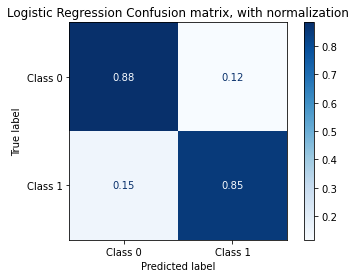

In [79]:
disp = metrics.plot_confusion_matrix(model_w, X_test_vectorized, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization')

In [78]:
len(feature_names)

4534

In [52]:
pred_proba_df = pd.DataFrame(model_w.predict_proba(X_test_vectorized))

In [56]:
pred_proba_df.head()

,0,1
0,3.304778e-01,0.669522
1,6.516002e-07,0.999999
2,4.642834e-01,0.535717
3,7.043650e-01,0.295635
4,3.021941e-01,0.697806


In [59]:
df.iloc[0]

Product                                    B07D2M6B23
Rating                                              5
Body                Great for rock painting details. 
Positively Rated                                    1
Name: 0, dtype: object

In [216]:
print(model_w.predict(vect.transform(['markers are good',
                                    'awful'])))

ValueError: X has 7604 features per sample; expecting 2490

In [217]:
print(model_w.predict(vect_tfidf.transform(['markers are good',
                                    'awful'])))

[1 0]


# Finding best params

In [207]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w,
                   "penalty": ["l1", "l2"],
                   "C": crange,
                   "fit_intercept": [True, False]  }

In [208]:
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train_vectorized, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

D:\Applications\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best score: 0.9535978605935129 with param: {'C': 19.0, 'class_weight': {0: 0.01, 1: 1.0}, 'fit_intercept': True, 'penalty': 'l2'}


# Treshold for prob

In [175]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test_vectorized))

    

In [184]:
pred_proba_df.tail(20)

,0,1
2477,0.000018,0.999982
2478,0.078013,0.921987
2479,0.999875,0.000125
2480,0.000001,0.999999
2481,0.007799,0.992201
2482,0.000162,0.999838
2483,0.002844,0.997156
2484,0.004536,0.995464
2485,0.001005,0.998995
2486,0.240347,0.759653


In [185]:
pd.set_option('display.max_colwidth', -1)
df.iloc[2483]

<ipython-input-185-f17cf8923485>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Product             B07D2LC8LH                                                                                                                          
Rating              1                                                                                                                                   
Body                Not at all what I thought they would be. They are very light and when you write on something over night to dry it doesn’t. It smears
Positively Rated    0                                                                                                                                   
Name: 2620, dtype: object

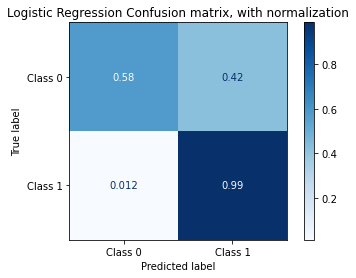

In [164]:
disp = metrics.plot_confusion_matrix(model, X_test_vectorized, y_test,
                                 display_labels=['Class 0', 'Class 1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

In [157]:
feature_importance = model.coef_[0]
sorted_idx = np.argsort(feature_importance)

In [158]:
top_10_pos_w = [list(vect.vocabulary_.keys())[list(vect.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['love', 'great', 'perfect', 'easy', 'good', 'bien', 'nice', 'awesome', 'colori', 'excellent']


# Adding len and running again bad idea

In [165]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:30]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-31:-1]]))

Smallest Coefs:
['non' 'not' 'pas' 'never' 'don work' 'return' 'half' 'disappointed'
 'wasn' 'nicht' 'paint is' 'cheap' 'splatter' 'terrible' 'returned'
 'very disappointed' 'transparent' 'idea' 'useless' 'bad' 'not work'
 'thought' 'not what' 'dried' 'at all' 'would not' 'every' 'permanent'
 'stick' 'all over']

Largest Coefs: 
['love' 'great' 'perfect' 'easy' 'good' 'bien' 'colori' 'nice' 'awesome'
 'excellent' 'better than' 'best' 'easy to' 'super' 'well' 'fun' 'me'
 'amazing' 'purchase' 'works' 'liked' 'lovely' 'that' 'going' 'flowing'
 'fantastic' 'fine' 'beautifully' 'need' 'loved']


In [47]:
print(model.predict(vect.transform(['markers are bad',
                                    'nice for painting'])))

[0 1]


In [84]:
dummy_majority = DummyClassifier(strategy = 'stratified').fit(X_train_vectorized, y_train)

In [85]:
y_dummy_predictions = dummy_majority.predict(vect.transform(X_test))

In [86]:
print('AUC: ', roc_auc_score(y_test, y_dummy_predictions))

AUC:  0.49612651973032207


# NLTK